In [1]:
!apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (9,670 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [3]:
from google.colab.patches import cv2_imshow
import pytesseract
import cv2
import numpy as np

In [4]:
!pip install ArabicOcr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [5]:
from ArabicOcr import arabicocr

In [6]:
!git clone https://github.com/shakex/card-rectification

Cloning into 'card-rectification'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 167 (delta 29), reused 46 (delta 14), pack-reused 100
Receiving objects: 100% (167/167), 115.04 MiB | 27.63 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [7]:
%cd card-rectification

/content/card-rectification


In [14]:
!python rectify.py "test.jpg" "test.jpg"

Success! Output saved in /content/card-rectification/test.jpg


In [15]:
def resize_ara_num(img):
    '''
    Input: Image
    Operation: Resizing
    Output: resized image

    '''
    #scale_percent = 50  # percent of original size
    width = 1280
    height = 819
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

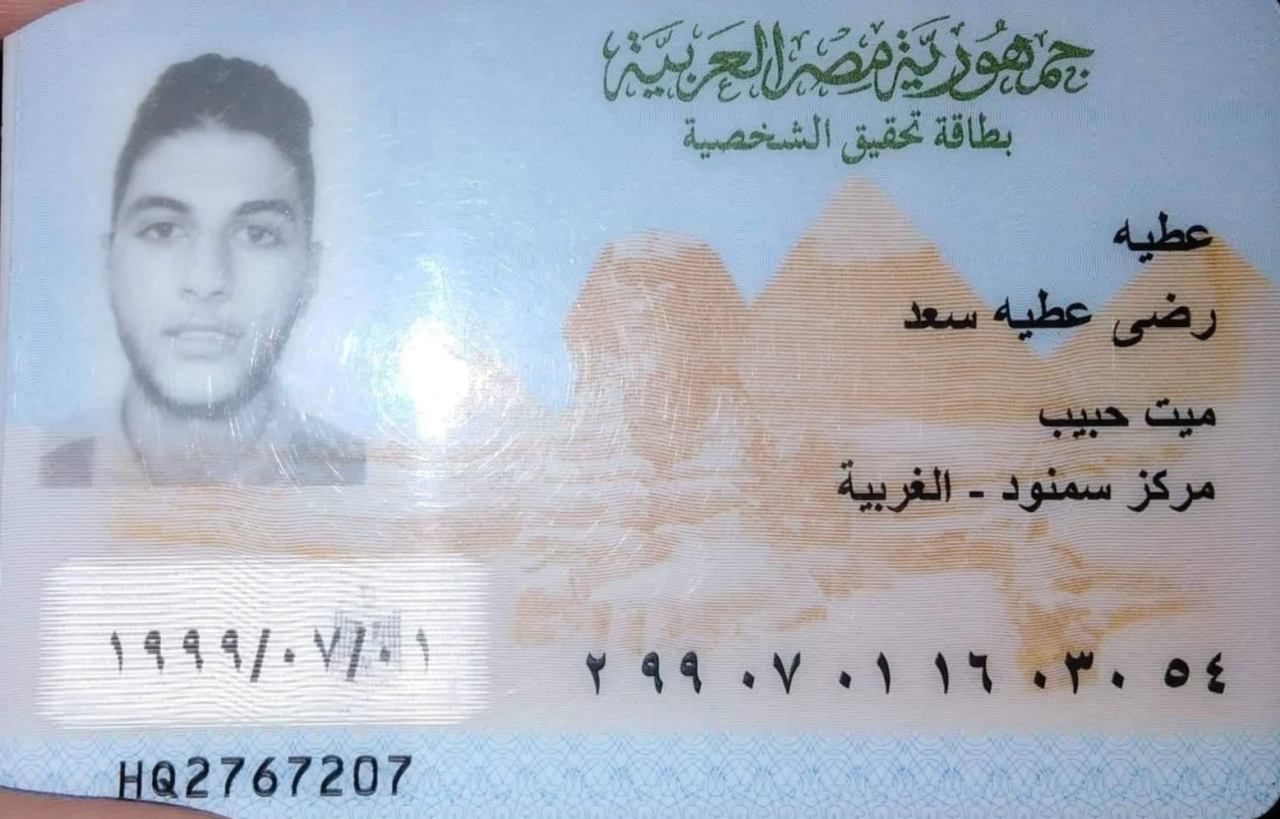

In [16]:
# Read an image
image = cv2.imread('test.jpg')

# Resize the image
img = resize_ara_num(image)

cv2_imshow(img)
# Display or save the resized image as needed


# **Rotating the Image Using Ref**

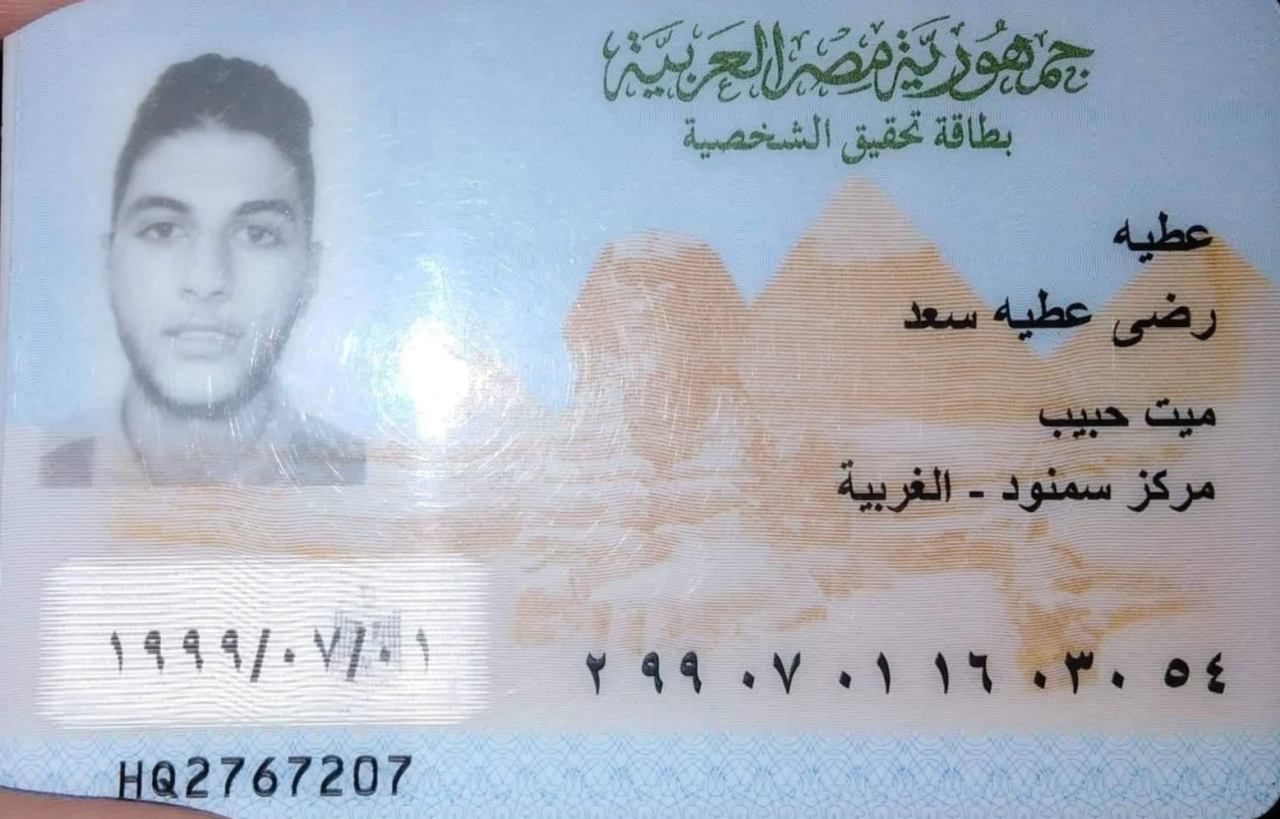

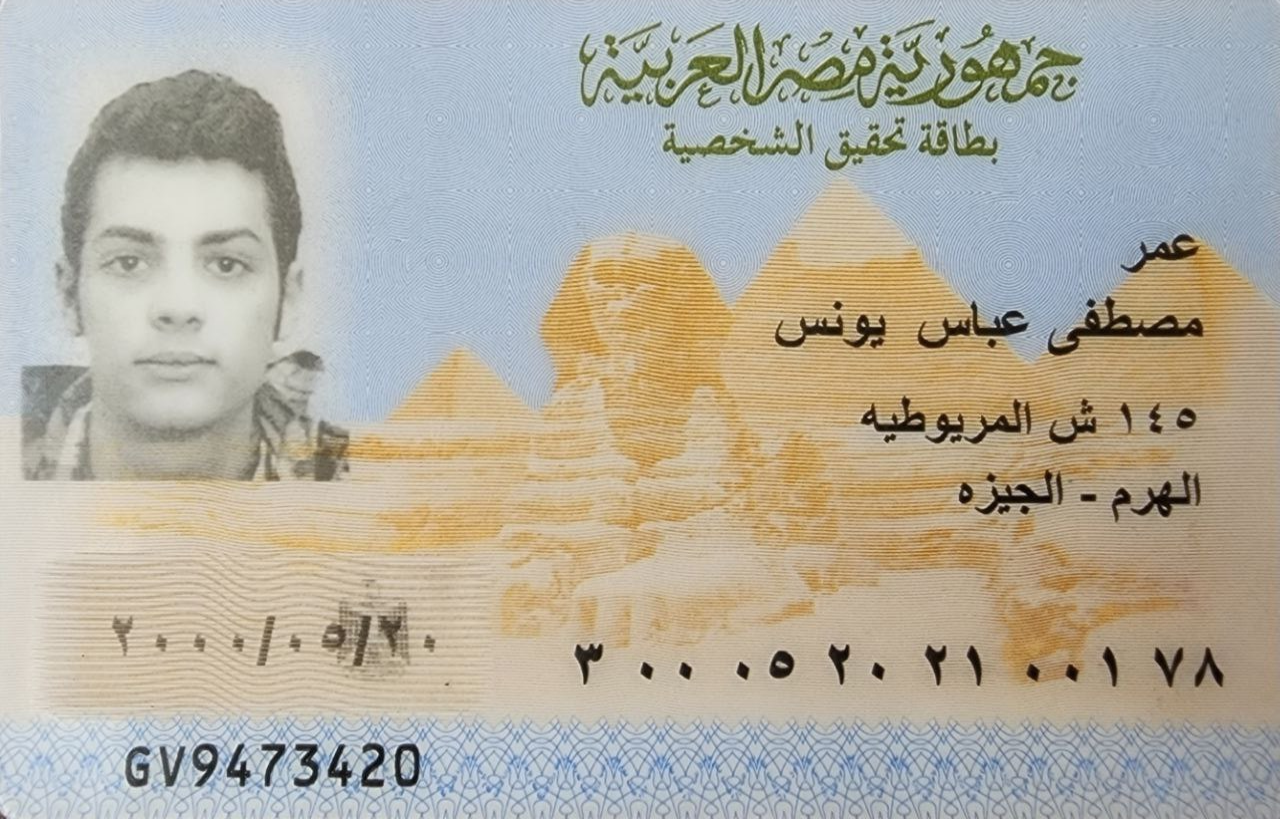

In [18]:
def resize_ara_num(img, width, height):
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

# Read Image to be aligned
imgTest = cv2.imread('test.jpg')
# Reference Reference image or Ideal image
imgRef = cv2.imread('ref.jpg')



# Define desired dimensions
width = 1280
height = 819

# Resize both images
imgTest = resize_ara_num(imgTest, width, height)
imgRef = resize_ara_num(imgRef, width, height)

# Show resized images
cv2_imshow(imgTest)
cv2_imshow(imgRef)




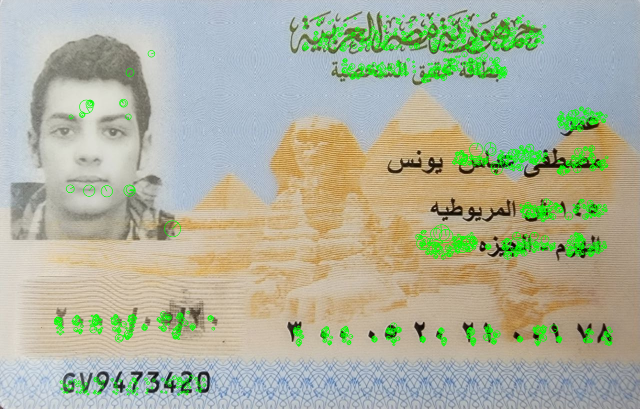

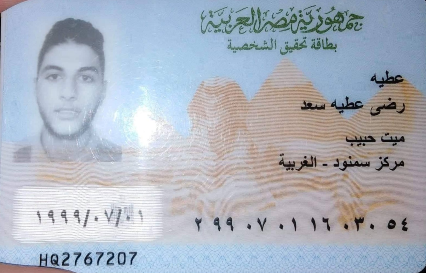

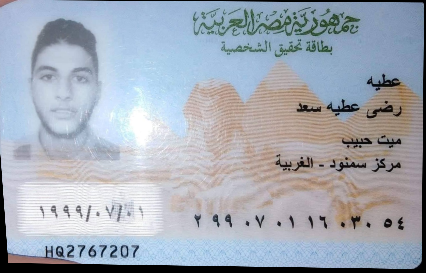

-1

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your images (imgTest and imgRef)

# Convert images to grayscale
imgTest_grey = cv2.cvtColor(imgTest, cv2.COLOR_BGR2GRAY)
imgRef_grey = cv2.cvtColor(imgRef, cv2.COLOR_BGR2GRAY)
height, width = imgRef_grey.shape

# Create an AKAZE detector
akaze_detector = cv2.AKAZE_create()

# Detect keypoints and compute descriptors for both images
keyPoint1, des1 = akaze_detector.detectAndCompute(imgTest_grey, None)
keyPoint2, des2 = akaze_detector.detectAndCompute(imgRef_grey, None)

# Display keypoints for reference image in green color
imgKp_Ref = cv2.drawKeypoints(imgRef, keyPoint1, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgKp_Ref = cv2.resize(imgKp_Ref, (width//2, height//2))

cv2_imshow(imgKp_Ref)
cv2.waitKey(0)


des1_float = des1.astype(np.float32)
des2_float = des2.astype(np.float32)

# Match features between two images using FlannBasedMatcher
flann_matcher = cv2.FlannBasedMatcher()

# Match the two sets of descriptors.
matches = flann_matcher.match(des1_float, des2_float)


# Sort matches based on their distances
matches = sorted(matches, key=lambda x: x.distance)

# Take the top 90 % matches forward.
matches = matches[:int(len(matches) * 0.9)]
no_of_matches = len(matches)

# Define 2x2 empty matrices
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

# Storing values to the matrices
for i in range(len(matches)):
    p1[i, :] = keyPoint1[matches[i].queryIdx].pt
    p2[i, :] = keyPoint2[matches[i].trainIdx].pt

# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use homography matrix to transform the unaligned image wrt the reference image.
aligned_img = cv2.warpPerspective(imgTest, homography, (width, height))
# Resizing the image to display in our screen (optional)
aligned_img = cv2.resize(aligned_img, (width//3, height//3))

# Copy of input image
imgTest_cp = imgTest.copy()
imgTest_cp = cv2.resize(imgTest_cp, (width//3, height//3))

# Display the original unaligned image and aligned image
cv2_imshow(imgTest_cp)
cv2_imshow(aligned_img)
cv2.waitKey(0)


# **Ocr**

In [20]:
def resize_ara_num(img):
    '''
    Input: Image
    Operation: Resizing
    Output: resized image
    '''
    #scale_percent = 50  # percent of original size
    width = 1280
    height = 819
    dim = (width, height)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return img

In [21]:
img = resize_ara_num(aligned_img)

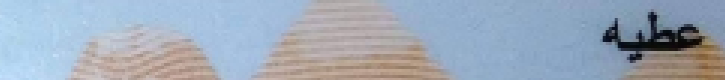

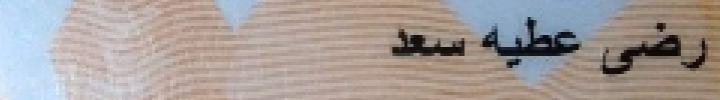

In [22]:
first_name = img[210:290, 500:1225]
cv2_imshow(first_name)
print('\n')
last_name = img[280:380, 500:1220]


print('\n')
cv2_imshow(last_name)
print('\n')

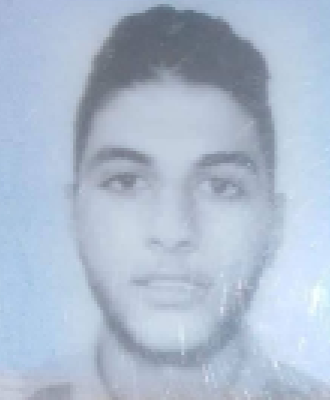

In [23]:
face  = img[50:450,20:350]
cv2_imshow(face)
print('\n')


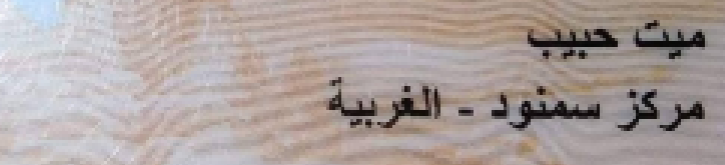

In [24]:
address = img[385:550, 500:1225]
cv2_imshow(address)
print('\n')


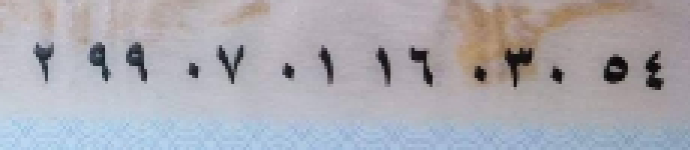

In [25]:
id = img[600:750, 550:1240]
cv2_imshow(id)
print('\n')


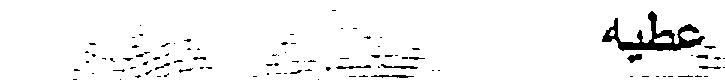

In [41]:
from google.colab.patches import cv2_imshow
import cv2

# Convert image to grayscale
first_gray = cv2.cvtColor(first_name, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(first_gray, (5, 5), 0)

# Apply Adaptive Gaussian Thresholding with fixed parameters
block_size = 21
C = 10
th_first = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

# Display the result
cv2_imshow(th_first)


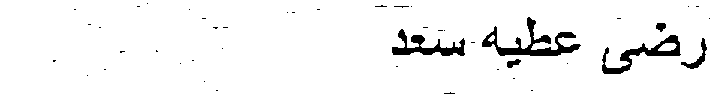

In [49]:
from google.colab.patches import cv2_imshow
import cv2

# Convert image to grayscale
last_gray = cv2.cvtColor(last_name, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(last_gray, (5, 5), 0)

# Apply Adaptive Gaussian Thresholding with fixed parameters
block_size = 21
C =15
th_last = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

# Display the result
cv2_imshow(th_last)

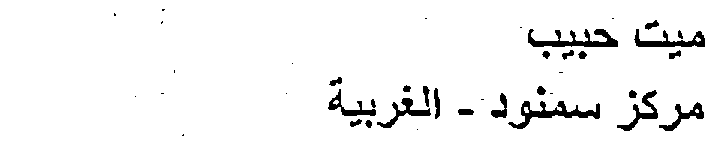

In [52]:
from google.colab.patches import cv2_imshow
import cv2

# Convert image to grayscale
address_gray = cv2.cvtColor(address, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(address_gray, (5, 5), 0)

# Apply Adaptive Gaussian Thresholding with fixed parameters
block_size = 21
C = 15
th_address = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

# Display the result
cv2_imshow(th_address)

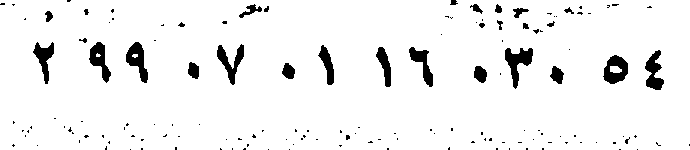

In [29]:
# Convert image to grayscale
id_gray = cv2.cvtColor(id, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(id_gray, (5, 5), 0)

# Apply Adaptive Gaussian Thresholding with fixed parameters
block_size = 35
C = 8
th_id = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

# Display the result
cv2_imshow(th_id)

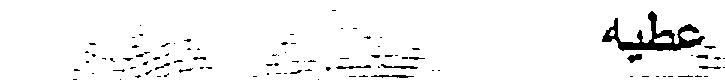

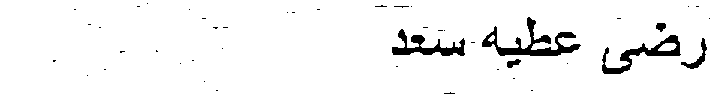

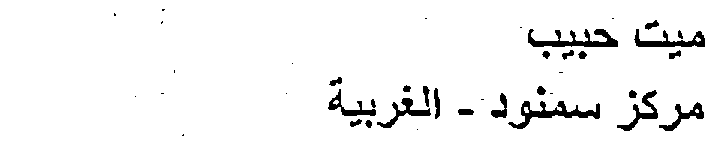

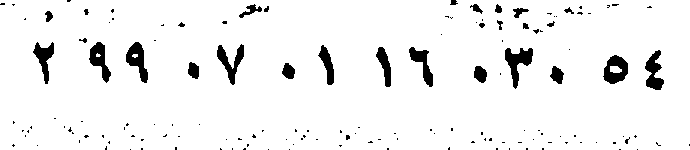

In [53]:
cv2.imwrite("th_first.jpg", th_first)
cv2.imwrite("th_last.jpg", th_last)
cv2.imwrite("th_address.jpg", th_address)
cv2.imwrite("th_id.jpg", th_id)
print('\n\n\n\n')
cv2_imshow(th_first)
print('\n\n\n\n')
cv2_imshow(th_last)
print('\n\n\n\n')
cv2_imshow(th_address)
print('\n\n\n\n')
cv2_imshow(th_id)

In [43]:
from ArabicOcr import arabicocr
image_path= 'th_first.jpg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))

[INFO] OCR'ing input image...
[INFO] 0.3463: عطيه
[[[[596, 12], [714, 12], [714, 66], [596, 66]], 'عطيه', 0.34631282091140747]]


In [51]:
from ArabicOcr import arabicocr
image_path= 'th_last.jpg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))

[INFO] OCR'ing input image...
[INFO] 0.8318: رضى عطيه ستد
[[[[384, 13], [718, 13], [718, 86], [384, 86]], 'رضى عطيه ستد', 0.8318047563805955]]


In [54]:
from ArabicOcr import arabicocr
image_path= 'th_address.jpg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))

[INFO] OCR'ing input image...
[INFO] 0.6808: ميت  حبيب
[INFO] 0.7498: مركز سمنود - الغربية
[[[[520, 12], [712, 12], [712, 64], [520, 64]], 'ميت  حبيب', 0.680782355369729], [[[319, 71], [713, 71], [713, 139], [319, 139]], 'مركز سمنود - الغربية', 0.7498380734543773]]


# **tesseract-ocr**

In [55]:
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

In [56]:
import os
from google.colab import files

In [57]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [58]:
uploaded = files.upload()

Saving arabic_numbers.traineddata to arabic_numbers.traineddata


In [59]:
file_path = next(iter(uploaded))

In [60]:
!mkdir -p /usr/share/tesseract-ocr/4.00/tessdata/

In [61]:
!mv {file_path} /usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata

In [62]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata

/usr/share/tesseract-ocr/4.00/tessdata/arabic_numbers.traineddata


array([[[171, 173, 190],
        [171, 173, 190],
        [172, 173, 190],
        ...,
        [159, 149, 161],
        [158, 149, 160],
        [158, 149, 160]],

       [[171, 173, 190],
        [171, 173, 190],
        [172, 173, 190],
        ...,
        [159, 149, 161],
        [158, 149, 160],
        [158, 149, 160]],

       [[171, 173, 190],
        [171, 173, 190],
        [172, 173, 190],
        ...,
        [159, 149, 161],
        [158, 149, 160],
        [158, 149, 160]],

       ...,

       [[240, 219, 187],
        [240, 219, 187],
        [239, 218, 186],
        ...,
        [183, 159, 139],
        [194, 170, 150],
        [194, 170, 150]],

       [[240, 219, 187],
        [240, 219, 187],
        [239, 218, 186],
        ...,
        [183, 159, 139],
        [194, 170, 150],
        [194, 170, 150]],

       [[240, 219, 187],
        [240, 219, 187],
        [239, 218, 186],
        ...,
        [183, 159, 139],
        [194, 170, 150],
        [194, 170, 150]]], dtype=uint8)
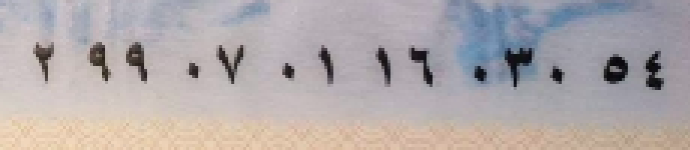

In [63]:
id

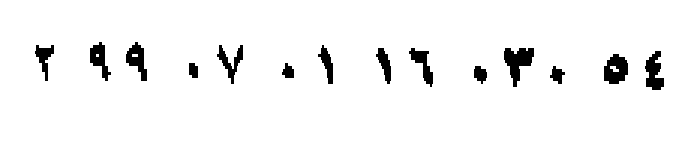

Text from Thresholding Method: 0
٢٩٩ ٠٧ ٠١ ١٦ ٠٣٠ ٥٤

--------------------------------------------------


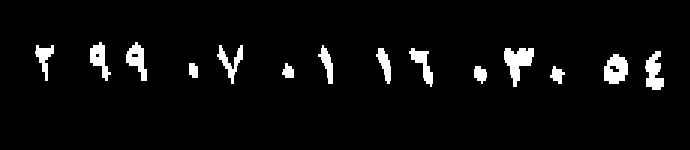

Text from Thresholding Method: 1
٢٩٩ ٠٧ ٠١ ١٦ ٠٣٠ ٥٤

--------------------------------------------------


In [65]:
id_gray = cv2.cvtColor(id, cv2.COLOR_BGR2GRAY)

# Define a list of thresholding methods to try
thresholding_methods = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
]

# Iterate through each thresholding method
for method in thresholding_methods:
    # Apply thresholding with the current method
    _, thresholded = cv2.threshold(id_gray, 0, 255, method + cv2.THRESH_OTSU)

    # Perform OCR on the thresholded image
    text = pytesseract.image_to_string(thresholded, lang="arabic_numbers")

    # Display the thresholded image
    cv2_imshow(thresholded)

    # Print the extracted text
    print("Text from Thresholding Method:", method)
    print(text)
    print("-" * 50)